In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
iris=pd.read_csv("Iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
iris[iris.duplicated(keep=False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


In [7]:
iris = iris.drop_duplicates(keep='first')


In [8]:
import seaborn as sns
counts=iris['variety'].value_counts()
counts

variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64

<Axes: xlabel='variety', ylabel='count'>

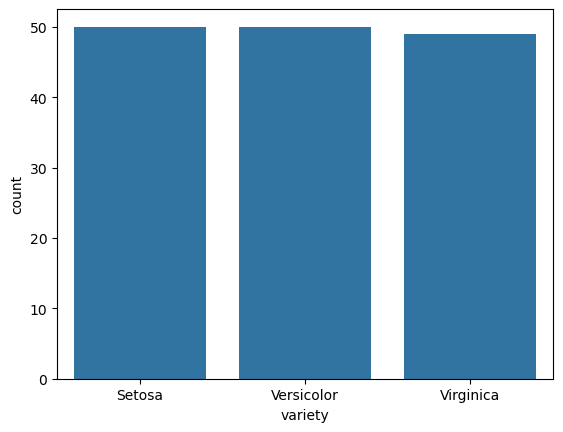

In [9]:
sns.barplot(data=counts)

In [10]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#observations 
-The x-coulmns are sepla.length,sepal.width,petal.length and petal.width
- all the x coluns are continous
- the -yclumn is 'variety' which is categircal
- there are thee flower categories

In [12]:
# reset the index
iris=iris.reset_index(drop=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Virginica
145,6.3,2.5,5.0,1.9,Virginica
146,6.5,3.0,5.2,2.0,Virginica
147,6.2,3.4,5.4,2.3,Virginica


# Perform label encoding of target column

In [28]:
# encode the three classes as 0,1,2
labelencoder=LabelEncoder()
iris.iloc[:,-1]= labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# observation
- the target coumn variety is stilll object ty[e. it needs to be converted to numeric(int)


In [40]:
# convert the target coulmn data type to intger
iris['variety']=pd.to_numeric(labelencoder.fit_transform(iris['variety']))
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [42]:
X=iris.iloc[:,0:4]
Y=iris['variety']

In [44]:
x_train,x_test,y_train,t_test=train_test_split(X,Y,test_size=0.3,random_state=1)
x_train

,sepal.length,sepal.width,petal.length,petal.width
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


# building decision tree classifier using Entrpy criteria

In [49]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

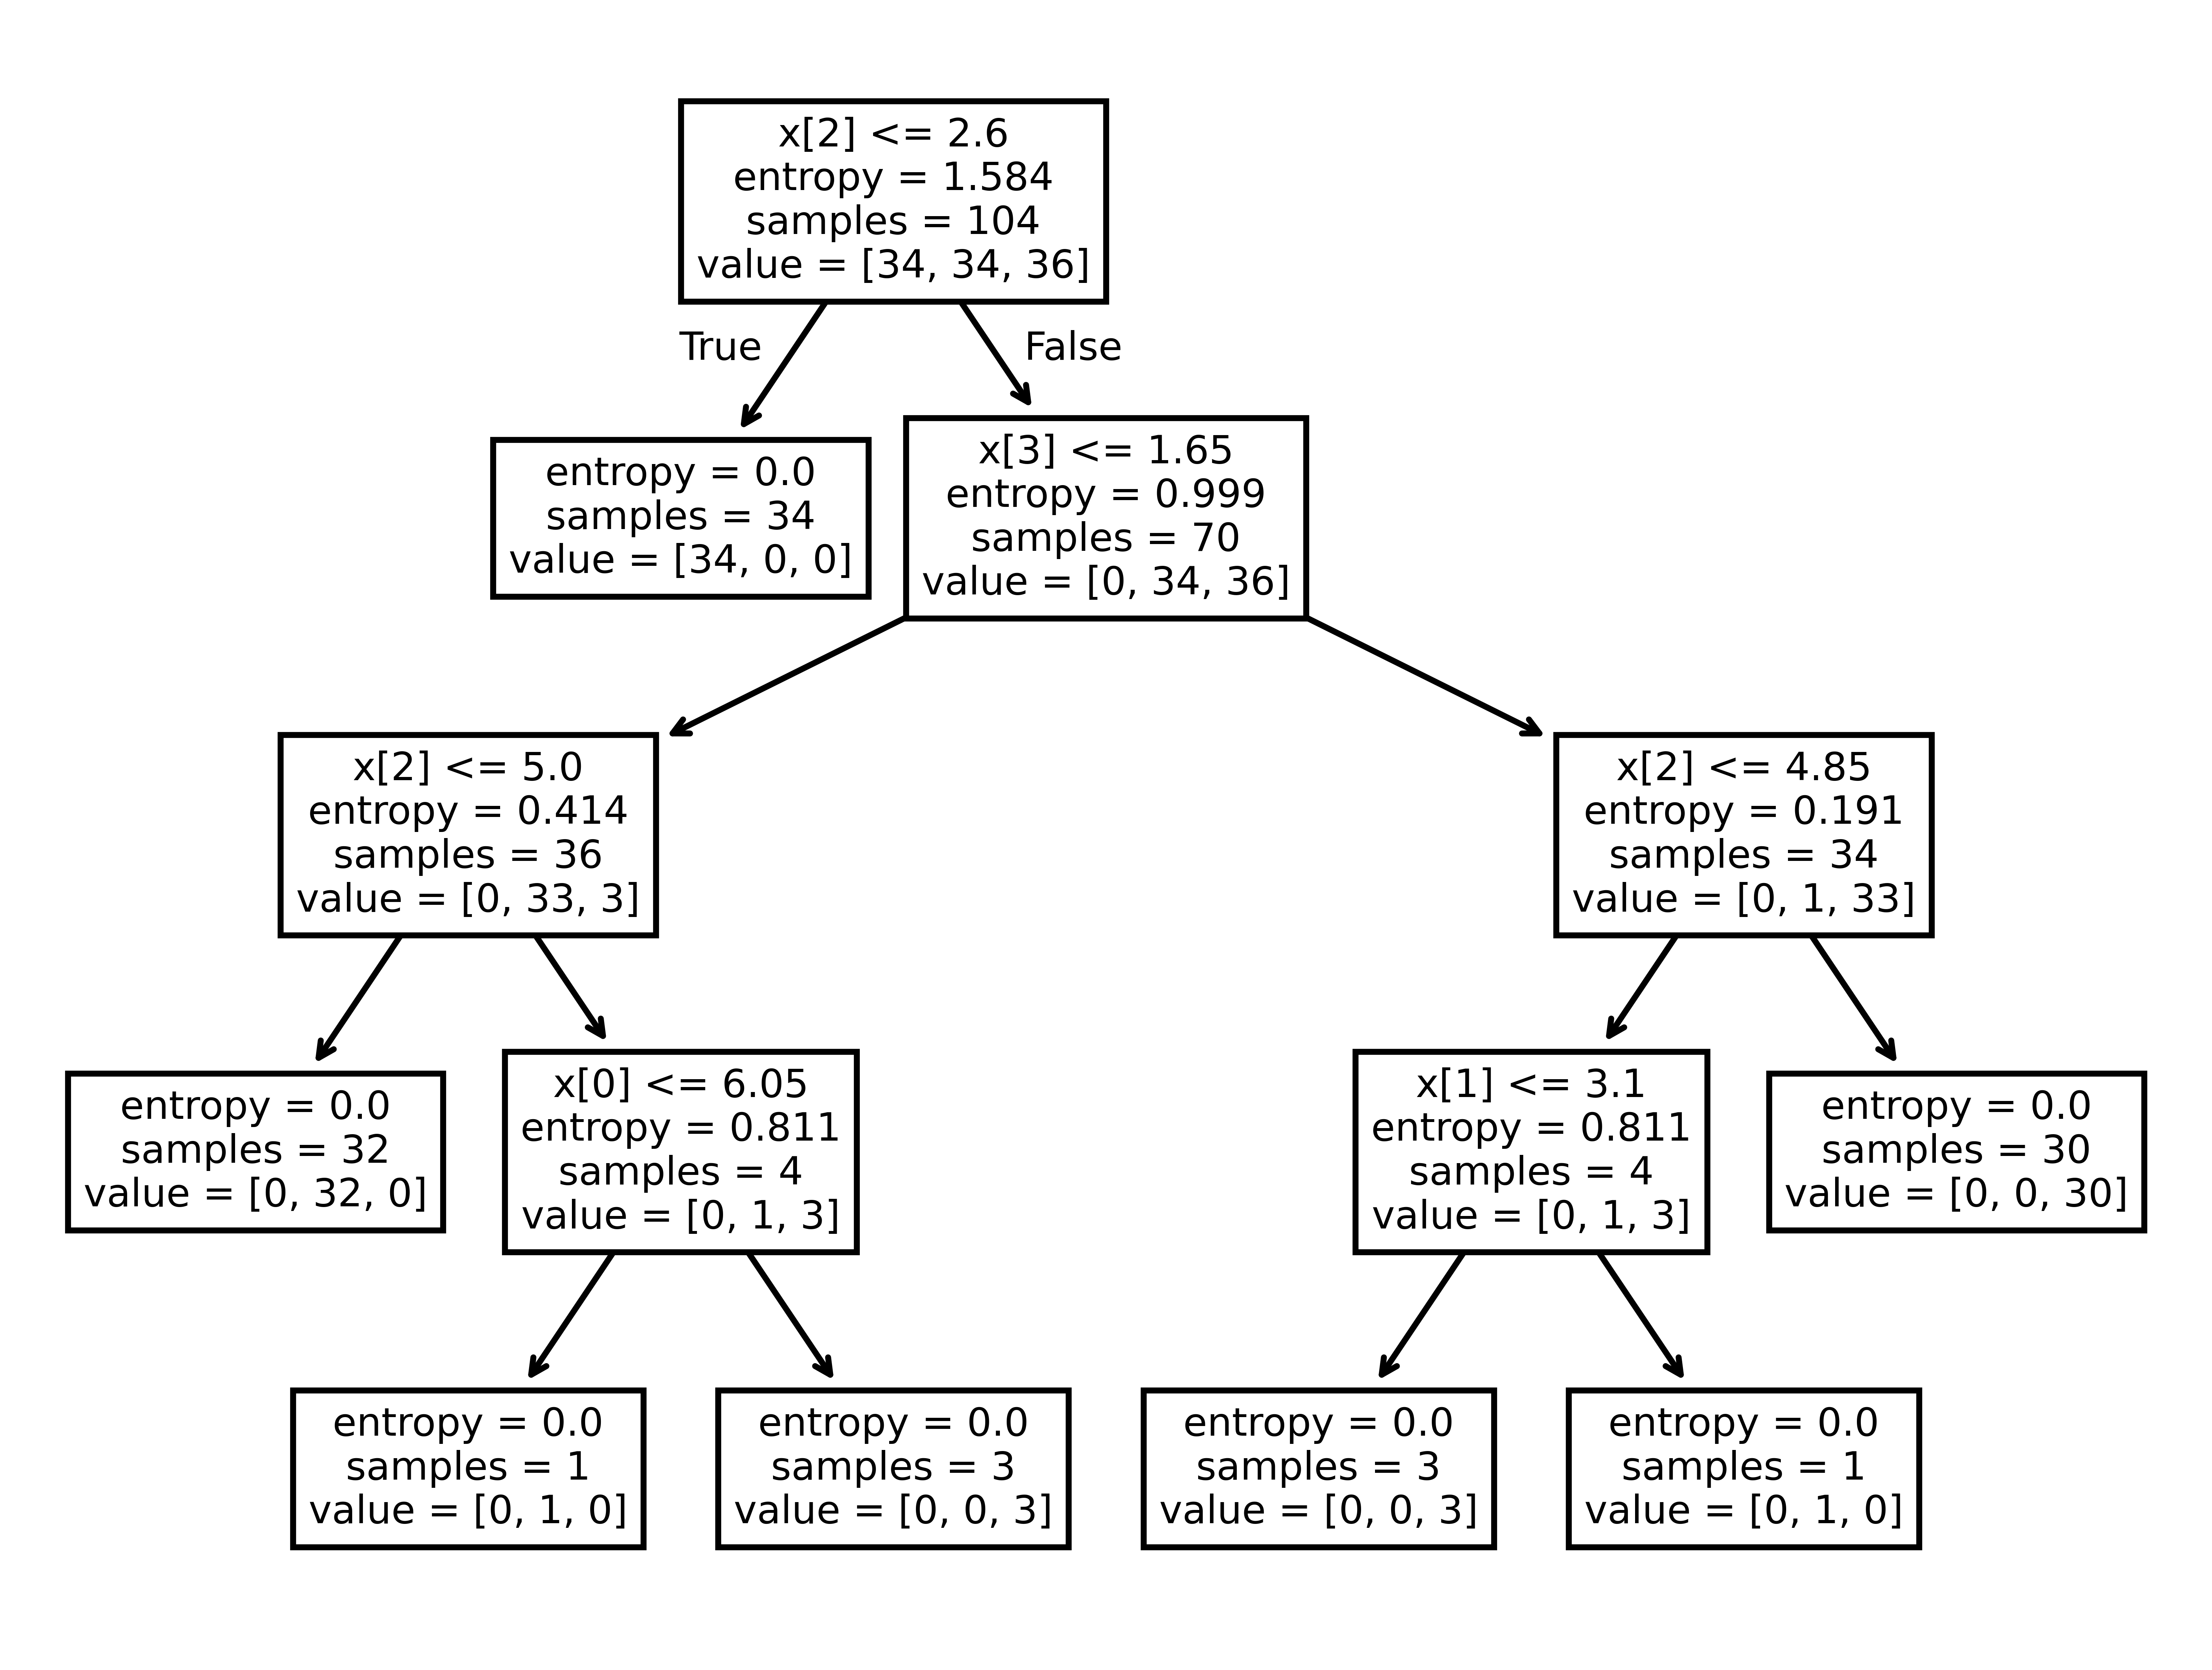

In [53]:
#plot the decison tree
plt.figure(dpi=1200)
tree.plot_tree(model);

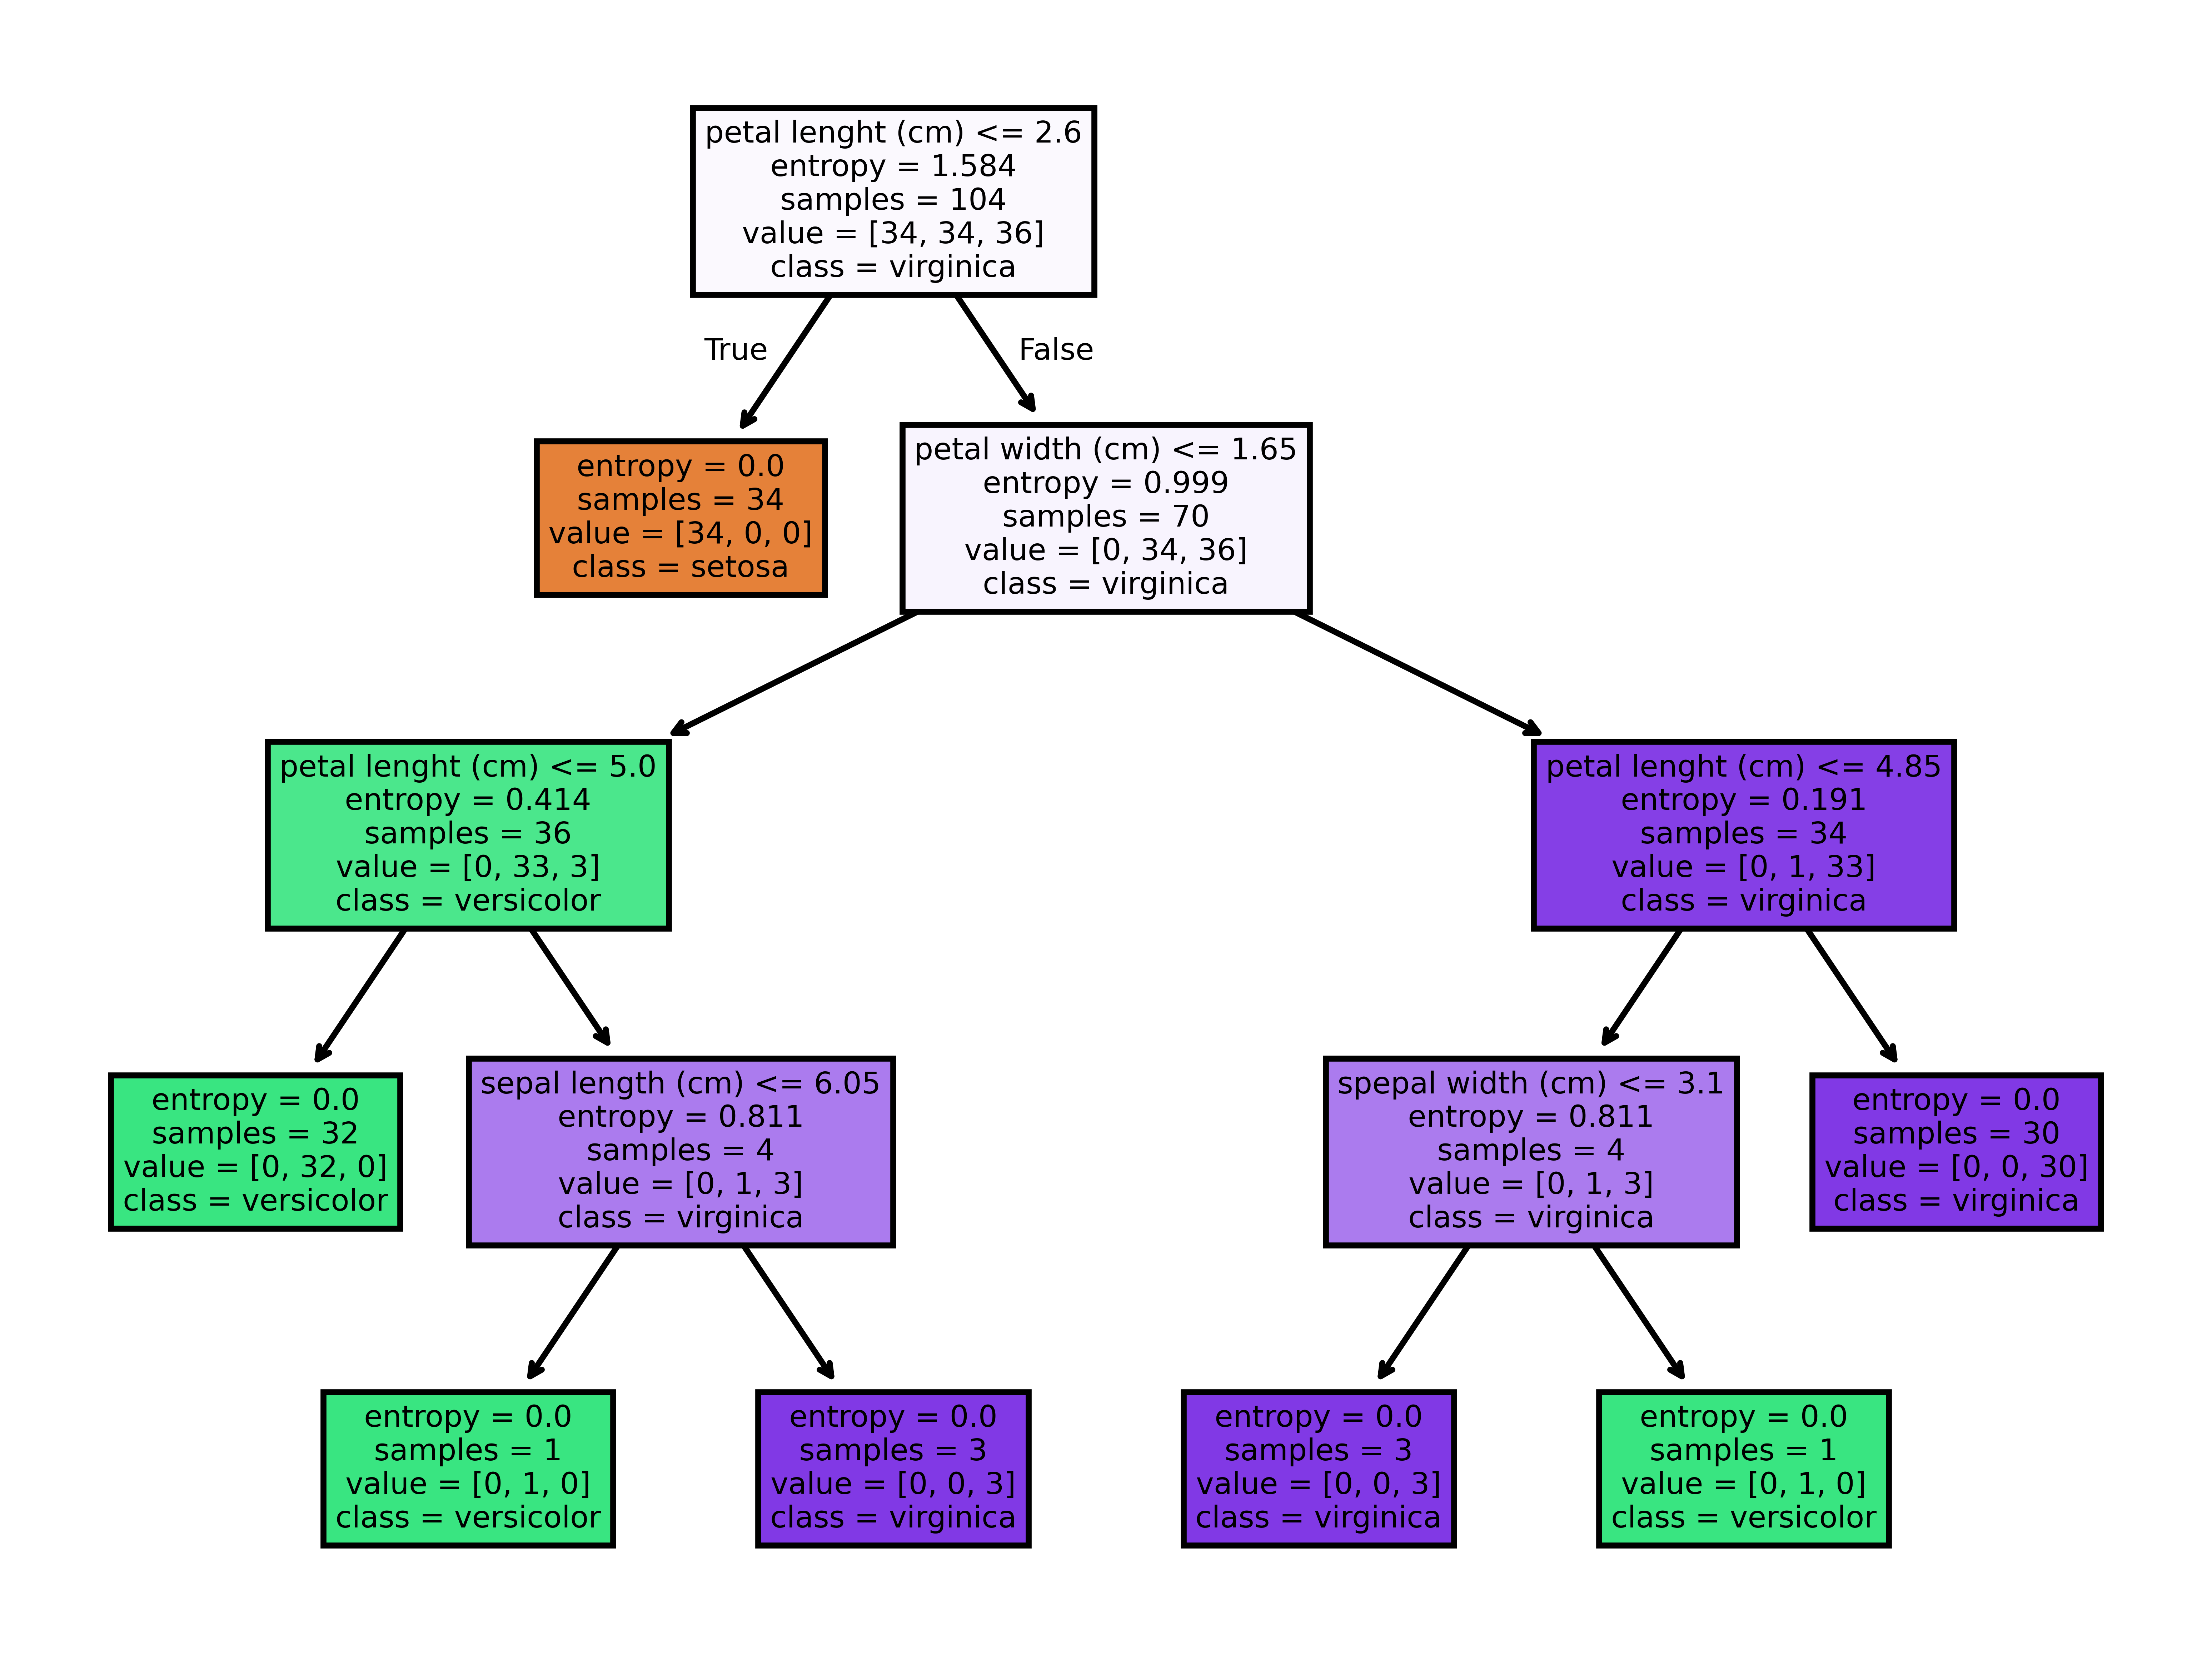

In [63]:
fn=['sepal length (cm)','spepal width (cm)',
   'petal lenght (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);